In [1]:
#Implement HPC application for AI/ML domain
#Binary classification using Deep Neural Networks Example: Classify movie reviews into “positive” reviews and “negative”
#reviews, just based on the text content of the reviews. IMDB dataset is used.
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Check for GPU availability
if tf.config.experimental.list_physical_devices('GPU'):
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available")
else:
    print("No GPU detected")

GPU is available


In [4]:
# Loading dataset
max_features = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
# Pad sequences to ensure uniform length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [6]:
# Define the model
model = Sequential([
    Embedding(max_features, 128),  # Remove input_length parameter
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 34s 42ms/step - loss: 0.3973 - accuracy: 0.8063 - val_loss: 0.2828 - val_accuracy: 0.8860
Epoch 2/10
704/704 [==============================] - 9s 13ms/step - loss: 0.1503 - accuracy: 0.9451 - val_loss: 0.2965 - val_accuracy: 0.8864
Epoch 3/10
704/704 [==============================] - 6s 9ms/step - loss: 0.0268 - accuracy: 0.9940 - val_loss: 0.3701 - val_accuracy: 0.8836
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.4160 - val_accuracy: 0.8892
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 6.0946e-04 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8896
Epoch 6/10
704/704 [==============================] - 5s 7ms/step - loss: 1.8936e-04 - accuracy: 1.0000 - val_loss: 0.4677 - val_accuracy: 0.8920
Epoch 7/10
704/704 [==============================] - 5s 7ms/step - loss: 1.0492e-04 - accuracy: 1.0000 - val_loss: 0.4885 - val_accuracy

In [9]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

782/782 [==============================] - 2s 2ms/step


In [10]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

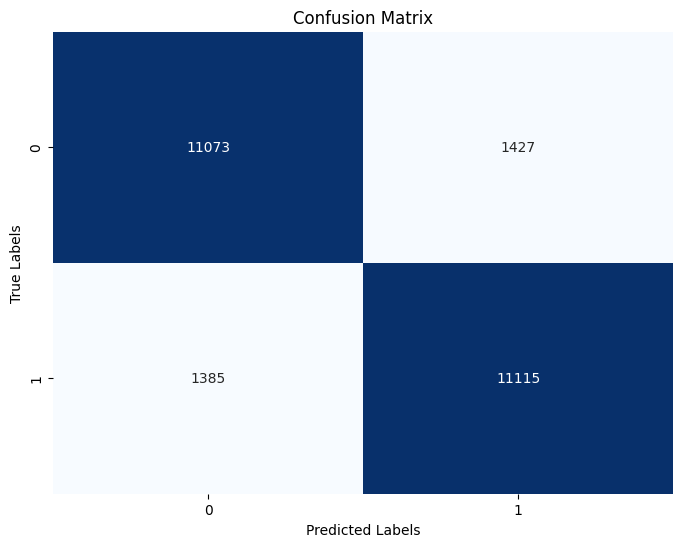

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

print("Accuracy : ", accuracy)
print("Precision : ", precision)

Accuracy :  0.88752
Precision :  0.8862222930952002


In [3]:
def getSmallestArea(grid):
    if not grid:
        return 0
    
    rows = len(grid)
    cols = len(grid[0])
    
    top = left = float('inf')
    bottom = right = float('-inf')
    
    # Find the boundaries of the contiguous 1's
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1:
                top = min(top, i)
                left = min(left, j)
                bottom = max(bottom, i)
                right = max(right, j)
    
    # Calculate the area of the smallest bounding rectangle
    return (bottom - top + 1) * (right - left + 1)

# Example usage:
grid = [[0, 1, 0], [0, 1, 0], [0, 1, 1]]
print(getSmallestArea(grid))  # Output: 4


6
